In [1]:
# ! pip install Sastrawi

## Import Libraries

In [2]:
# Import Libraries

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import models, layers
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

## Load Dataset

In [3]:
# Read Dataset
data = pd.read_csv('dataset.csv')

data.head()

,content,date,title,label
0,Berita SurabayaSURYA.co.id | SURABAYA - Pengem...,"Jumat, 10 Juni 2022 01:08",PT Intiland Development Kembangkan Kawasan Ind...,noclickbait
1,Berita SurabayaSURYA.co.id | SURABAYA - Brand ...,"Jumat, 10 Juni 2022 01:16",ANKER Menangkan Penghargaan Nobel Prize di Aja...,noclickbait
2,Berita SurabayaSURYA.co.id | SURABAYA - PT Har...,"Jumat, 10 Juni 2022 01:27","Perluas Bisnis, Hartadinata Abadi Store Buka G...",noclickbait
3,Berita SurabayaSURYA.co.id | SURABAYA – Peneri...,"Jumat, 10 Juni 2022 01:34","PPDB SMP Dibuka Hari Ini, Dindik Surabaya Mint...",clickbait
4,"SURYA.co.id I Masih ingat Ronaldo Nazario, san...","Jumat, 10 Juni 2022 01:51","Liga Spanyol, Ronaldo Legenda Real Madrid, Jad...",clickbait


In [4]:
data.describe(include='all')

,content,date,title,label
count,1600,1600,1600,1600
unique,1596,1532,1595,2
top,"SURYA.CO.ID, LAMONGAN - Kawasan Pantura (Panta...","Kamis, 20 Oktober 2022 09:15",Dideklarasikan Emak-Emak Lamongan di Pinggir K...,noclickbait
freq,2,3,2,800


In [5]:
# Target column is made of string values True/Fake, let's change it to numbers 0/1 (clickbait=1) 
data['binary_label'] = pd.get_dummies(data.label)['clickbait']
data.head()

,content,date,title,label,binary_label
0,Berita SurabayaSURYA.co.id | SURABAYA - Pengem...,"Jumat, 10 Juni 2022 01:08",PT Intiland Development Kembangkan Kawasan Ind...,noclickbait,0
1,Berita SurabayaSURYA.co.id | SURABAYA - Brand ...,"Jumat, 10 Juni 2022 01:16",ANKER Menangkan Penghargaan Nobel Prize di Aja...,noclickbait,0
2,Berita SurabayaSURYA.co.id | SURABAYA - PT Har...,"Jumat, 10 Juni 2022 01:27","Perluas Bisnis, Hartadinata Abadi Store Buka G...",noclickbait,0
3,Berita SurabayaSURYA.co.id | SURABAYA – Peneri...,"Jumat, 10 Juni 2022 01:34","PPDB SMP Dibuka Hari Ini, Dindik Surabaya Mint...",clickbait,1
4,"SURYA.co.id I Masih ingat Ronaldo Nazario, san...","Jumat, 10 Juni 2022 01:51","Liga Spanyol, Ronaldo Legenda Real Madrid, Jad...",clickbait,1


In [6]:
data['binary_label'].value_counts()

0    800
1    800
Name: binary_label, dtype: int64

([<matplotlib.patches.Wedge at 0x1c1cfd78760>,
 [Text(-1.2000000000000002, 1.469576158976824e-16, 'clickbait'),
  Text(1.2000000000000002, -2.939152317953648e-16, 'noclickbait')],
 [Text(-0.7, 8.572527594031472e-17, '50.0%'),
  Text(0.7, -1.7145055188062944e-16, '50.0%')])

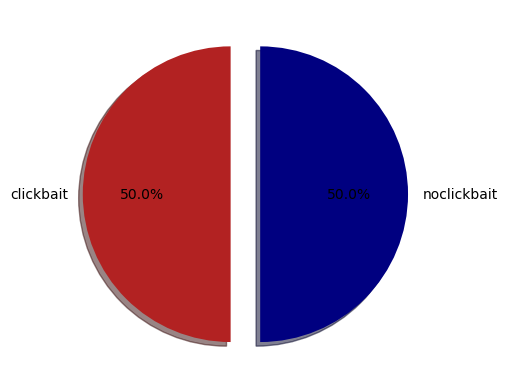

In [7]:
# Checking if our data
label_size = [data['binary_label'].sum(),len(data['binary_label'])-data['binary_label'].sum()]
plt.pie(label_size,explode=[0.1,0.1],colors=['firebrick','navy'],startangle=90,shadow=True,labels=['clickbait','noclickbait'],autopct='%1.1f%%')

In [8]:
data.groupby('label').count()

,content,date,title,binary_label
label,,,,
clickbait,800,800,800,800
noclickbait,800,800,800,800


## Train-test-split

In [9]:
# Data info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   content       1600 non-null   object
 1   date          1600 non-null   object
 2   title         1600 non-null   object
 3   label         1600 non-null   object
 4   binary_label  1600 non-null   uint8 
dtypes: object(4), uint8(1)
memory usage: 51.7+ KB


In [10]:
#contoh data yang sudah di combine
for i in data.loc[8][['title', 'content']]:
    print(i,'\n')

Anggota KKB Papua Ceroboh, Perannya Sebagai Pemasok Amunisi Terbongkar Gara-gara Bacok Warga Sipil 

SURYA.co.id - Gara-gara kecerobohannya sendiri, seorang anggota KKB Papua berhasil ditangkap aparat TNI -Polri.Tak hanya itu, perannya sebagai pemasok amunisi untuk KKB Papua juga ikut terbongkar.Penyebab awalnya adalah ia nekat membacok warga sipil di Intan Jaya pada April 2021 lalu.Polisi langsung menangkapnya dan akhirnya terbongkar perannya sebagai anggota KKB Papua yang bertugas memasok amunisi.Melansir dari laman tribratanews.polri.go.id, berdasarkan Informasi adanya keberadaan Tersangka Pembacokan Warga Intan Jaya pada April 2021 di Pertigaan Pasar Yokatapang, Tim Aparat Gabungan Ops Damai Cartenz 2020 melakukan pegecekan dan penyelidikan. Dari hasil pengecekan, tersangka terlihat di Kali Wabu, Rabu (08/06/2022).Selanjutnya, tim bergerak dan berhasil mengamankan tersangka yang diketahui berinisial FS.Dari hasil pemeriksaan sementara, tersangka FS ini juga merupakan anggota KKB Pa

Preprocessing

In [11]:
import re

import nltk

from nltk import punkt
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer,HashingVectorizer

import pickle

import warnings
warnings.filterwarnings('ignore')

In [12]:
#membersihkan data
def cleaning(text):
    #remove url
    text = re.sub(r"http\S+", "", str(text))
    #remove hex characters
    text = re.sub(r'(\\x(.){2})', '', text)
    #menghapus spasi awal teks
    text = text.lstrip()
    #remove newlines
    text = re.sub(r'\s+|\\n', ' ', text)
    #remove hashtags
    text = re.sub(r'\B#\w*[a-zA-Z]+\w*','', text)
    #remove single char
    text = re.sub(r'\b[a-zA-Z]\b','', text)
    #remove number
    text = re.sub(r'\d+','', text)
    #remove punctuation / tanda baca
    text = re.sub(r'[^\w\s]+', ' ', text)
    #remove spasi dari awal teks
    text = re.sub(r"/^\\s+/m", '', text)
    #remove character yang memilliki kurang dari 4 huruf
    text = re.sub(r'\b\w{1,3}\b', '', text)
    #remove spasi berlebih
    text = re.sub(r'\s+', ' ', text)
    #remove non-ascii character
    text = re.sub('[^\x00-\x7F]+', '', text)
    return text

data['Judul_clean'] = data['title'].apply(cleaning)
data['Content_clean'] = data['content'].apply(cleaning)

In [13]:
#contoh data yang sudah dibersihkan
for i in data.loc[8][['Judul_clean','Content_clean']]:
    print(i,'\n')

Anggota Papua Ceroboh Perannya Sebagai Pemasok Amunisi Terbongkar Gara gara Bacok Warga Sipil 

SURYA Gara gara kecerobohannya sendiri seorang anggota Papua berhasil ditangkap aparat Polri hanya perannya sebagai pemasok amunisi untuk Papua juga ikut terbongkar Penyebab awalnya adalah nekat membacok warga sipil Intan Jaya pada April lalu Polisi langsung menangkapnya akhirnya terbongkar perannya sebagai anggota Papua yang bertugas memasok amunisi Melansir dari laman tribratanews polri berdasarkan Informasi adanya keberadaan Tersangka Pembacokan Warga Intan Jaya pada April Pertigaan Pasar Yokatapang Aparat Gabungan Damai Cartenz melakukan pegecekan penyelidikan Dari hasil pengecekan tersangka terlihat Kali Wabu Rabu Selanjutnya bergerak berhasil mengamankan tersangka yang diketahui berinisial Dari hasil pemeriksaan sementara tersangka juga merupakan anggota Papua Aktif dibenarkan oleh Kabid Humas Polda Papua Kombes Mustofa Kamal saat dikonfirmasi Pihaknya menyebutkan penangkanapan berawal

In [14]:
# Case folding

In [15]:
#mengubah huruf kapital menjadi huruf kecil
data['Judul_case'] = data['Judul_clean'].str.lower()
data['Content_case'] = data['Content_clean'].str.lower()

In [16]:
#contoh data yang sudah di casefolding
for i in data.loc[8][['Judul_case','Content_case']]:
    print(i,'\n')

anggota papua ceroboh perannya sebagai pemasok amunisi terbongkar gara gara bacok warga sipil 

surya gara gara kecerobohannya sendiri seorang anggota papua berhasil ditangkap aparat polri hanya perannya sebagai pemasok amunisi untuk papua juga ikut terbongkar penyebab awalnya adalah nekat membacok warga sipil intan jaya pada april lalu polisi langsung menangkapnya akhirnya terbongkar perannya sebagai anggota papua yang bertugas memasok amunisi melansir dari laman tribratanews polri berdasarkan informasi adanya keberadaan tersangka pembacokan warga intan jaya pada april pertigaan pasar yokatapang aparat gabungan damai cartenz melakukan pegecekan penyelidikan dari hasil pengecekan tersangka terlihat kali wabu rabu selanjutnya bergerak berhasil mengamankan tersangka yang diketahui berinisial dari hasil pemeriksaan sementara tersangka juga merupakan anggota papua aktif dibenarkan oleh kabid humas polda papua kombes mustofa kamal saat dikonfirmasi pihaknya menyebutkan penangkanapan berawal

In [17]:
def token(text):
    nstr = text.split(' ')
    dat= []
    a = -1
    for hu in nstr:
        a = a + 1
        if hu == '':
            dat.append(a)
        p = 0
        b = 0
        for q in dat:
            b = q - p
            del nstr[b]
            p = p + 1
    return nstr

In [18]:
#memisahkan kalimat menjadi potongan kata
data['Judul_tok'] = data['Judul_case'].apply(token)
data['Content_tok'] = data['Content_case'].apply(token)

In [19]:
for i in data.loc[8][['Judul_tok','Content_tok']]:
    print(i,'\n')

['anggota', 'papua', 'ceroboh', 'perannya', 'sebagai', 'pemasok', 'amunisi', 'terbongkar', 'gara', 'gara', 'bacok', 'warga', 'sipil'] 

['surya', 'gara', 'gara', 'kecerobohannya', 'sendiri', 'seorang', 'anggota', 'papua', 'berhasil', 'ditangkap', 'aparat', 'polri', 'hanya', 'perannya', 'sebagai', 'pemasok', 'amunisi', 'untuk', 'papua', 'juga', 'ikut', 'terbongkar', 'penyebab', 'awalnya', 'adalah', 'nekat', 'membacok', 'warga', 'sipil', 'intan', 'jaya', 'pada', 'april', 'lalu', 'polisi', 'langsung', 'menangkapnya', 'akhirnya', 'terbongkar', 'perannya', 'sebagai', 'anggota', 'papua', 'yang', 'bertugas', 'memasok', 'amunisi', 'melansir', 'dari', 'laman', 'tribratanews', 'polri', 'berdasarkan', 'informasi', 'adanya', 'keberadaan', 'tersangka', 'pembacokan', 'warga', 'intan', 'jaya', 'pada', 'april', 'pertigaan', 'pasar', 'yokatapang', 'aparat', 'gabungan', 'damai', 'cartenz', 'melakukan', 'pegecekan', 'penyelidikan', 'dari', 'hasil', 'pengecekan', 'tersangka', 'terlihat', 'kali', 'wabu', '

In [20]:
#menghapus kata yang kurang penting, namun sering muncul (stopword) seperti kata penghubung
#mengambil stopword dari library python sastrawi
import nltk
nltk.download('stopwords')

listStopword = set(stopwords.words('indonesian'))
listStopword.update(set(stopwords.words('english')))

def stopwords_removal(words):
    return [word for word in words if word not in listStopword]

data['Judul_Stopwords'] = data['Judul_tok'].apply(stopwords_removal)
data['Content_Stopwords'] = data['Content_tok'].apply(stopwords_removal)

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [21]:
for i in data.loc[8][['Judul_Stopwords','Content_Stopwords']]:
    print(i,'\n')

['anggota', 'papua', 'ceroboh', 'perannya', 'pemasok', 'amunisi', 'terbongkar', 'gara', 'gara', 'bacok', 'warga', 'sipil'] 

['surya', 'gara', 'gara', 'kecerobohannya', 'anggota', 'papua', 'berhasil', 'ditangkap', 'aparat', 'polri', 'perannya', 'pemasok', 'amunisi', 'papua', 'terbongkar', 'penyebab', 'nekat', 'membacok', 'warga', 'sipil', 'intan', 'jaya', 'april', 'polisi', 'langsung', 'menangkapnya', 'terbongkar', 'perannya', 'anggota', 'papua', 'bertugas', 'memasok', 'amunisi', 'melansir', 'laman', 'tribratanews', 'polri', 'berdasarkan', 'informasi', 'keberadaan', 'tersangka', 'pembacokan', 'warga', 'intan', 'jaya', 'april', 'pertigaan', 'pasar', 'yokatapang', 'aparat', 'gabungan', 'damai', 'cartenz', 'pegecekan', 'penyelidikan', 'hasil', 'pengecekan', 'tersangka', 'kali', 'wabu', 'rabu', 'bergerak', 'berhasil', 'mengamankan', 'tersangka', 'berinisial', 'hasil', 'pemeriksaan', 'tersangka', 'anggota', 'papua', 'aktif', 'dibenarkan', 'kabid', 'humas', 'polda', 'papua', 'kombes', 'musto

In [22]:
#mengembalikan token menjadi string tunggal kembali untuk stemming
def untokenize(text):
    
    text = ' '.join(text)
    step1 = text.replace("`` ", '"').replace(" ''", '"').replace('. . .',  '...')
    step2 = step1.replace(" ( ", " (").replace(" ) ", ") ")
    step3 = re.sub(r' ([.,:;?!%]+)([ \'"`])', r"\1\2", step2)
    step4 = re.sub(r' ([.,:;?!%]+)$', r"\1", step3)
    step5 = step4.replace(" '", "'").replace(" n't", "n't").replace(
         "can not", "cannot")
    step6 = step5.replace(" ` ", " '")
    return step6.strip()

data['Untokenized_judul'] = data['Judul_Stopwords'].apply(untokenize)
data['Untokenized_content'] = data['Content_Stopwords'].apply(untokenize)

In [23]:
for i in data.loc[8][['Untokenized_judul','Untokenized_content']]:
    print(i,'\n')

anggota papua ceroboh perannya pemasok amunisi terbongkar gara gara bacok warga sipil 

surya gara gara kecerobohannya anggota papua berhasil ditangkap aparat polri perannya pemasok amunisi papua terbongkar penyebab nekat membacok warga sipil intan jaya april polisi langsung menangkapnya terbongkar perannya anggota papua bertugas memasok amunisi melansir laman tribratanews polri berdasarkan informasi keberadaan tersangka pembacokan warga intan jaya april pertigaan pasar yokatapang aparat gabungan damai cartenz pegecekan penyelidikan hasil pengecekan tersangka kali wabu rabu bergerak berhasil mengamankan tersangka berinisial hasil pemeriksaan tersangka anggota papua aktif dibenarkan kabid humas polda papua kombes mustofa kamal dikonfirmasi penangkanapan penyeledikan pembacokan asep saputra april informasi berhasil mengamankan tersangka lakukan pengembangan hasil pengembangan kasatgas tersangka jaringan pengadaan amunisi papua terbukti mengamankan tersangka petugas menemukan butir amunis

In [24]:
data.sample(10)

,content,date,title,label,binary_label,Judul_clean,Content_clean,Judul_case,Content_case,Judul_tok,Content_tok,Judul_Stopwords,Content_Stopwords,Untokenized_judul,Untokenized_content
1220,"SURYA.CO.ID, GRESIK - Merayakan Hari Ulang Tah...","Rabu, 10 Agustus 2022 10:58","Jelang Peringatan Kemerdekaan RI, Warga Gresik...",clickbait,1,Jelang Peringatan Kemerdekaan Warga Gresik Bik...,SURYA GRESIK Merayakan Hari Ulang Tahun Kemerd...,jelang peringatan kemerdekaan warga gresik bik...,surya gresik merayakan hari ulang tahun kemerd...,"[jelang, peringatan, kemerdekaan, warga, gresi...","[surya, gresik, merayakan, hari, ulang, tahun,...","[jelang, peringatan, kemerdekaan, warga, gresi...","[surya, gresik, merayakan, ulang, kemerdekaan,...",jelang peringatan kemerdekaan warga gresik bik...,surya gresik merayakan ulang kemerdekaan repub...
721,Berita BlitarSURYA.co.id I BLITAR - Angka peng...,"Kamis, 10 November 2022 19:01",Pemkot Blitar Targetkan Angka Pengangguran Ber...,noclickbait,0,Pemkot Blitar Targetkan Angka Pengangguran Ber...,Berita BlitarSURYA BLITAR Angka pengangguran K...,pemkot blitar targetkan angka pengangguran ber...,berita blitarsurya blitar angka pengangguran k...,"[pemkot, blitar, targetkan, angka, penganggura...","[berita, blitarsurya, blitar, angka, penganggu...","[pemkot, blitar, targetkan, angka, penganggura...","[berita, blitarsurya, blitar, angka, penganggu...",pemkot blitar targetkan angka pengangguran ber...,berita blitarsurya blitar angka pengangguran k...
1533,SURYA.co.id | LAMONGAN - Berikut sosok Samudra...,"Senin, 10 Januari 2022 18:39","SOSOK Samudra Zahrotul Bilad, Mahasiswi Lamong...",clickbait,1,SOSOK Samudra Zahrotul Bilad Mahasiswi Lamonga...,SURYA LAMONGAN Berikut sosok Samudra Zahrotul ...,sosok samudra zahrotul bilad mahasiswi lamonga...,surya lamongan berikut sosok samudra zahrotul ...,"[sosok, samudra, zahrotul, bilad, mahasiswi, l...","[surya, lamongan, berikut, sosok, samudra, zah...","[sosok, samudra, zahrotul, bilad, mahasiswi, l...","[surya, lamongan, sosok, samudra, zahrotul, bi...",sosok samudra zahrotul bilad mahasiswi lamonga...,surya lamongan sosok samudra zahrotul bilad ma...
895,SURYA.co.id |SIDOARJO - Deltras Sidoarjo berha...,"Kamis, 20 Januari 2022 20:31","Pelatih Deltras Kecewa, Dua Pemainnya Cidera d...",noclickbait,0,Pelatih Deltras Kecewa Pemainnya Cidera Laga Coba,SURYA SIDOARJO Deltras Sidoarjo berhasil memet...,pelatih deltras kecewa pemainnya cidera laga coba,surya sidoarjo deltras sidoarjo berhasil memet...,"[pelatih, deltras, kecewa, pemainnya, cidera, ...","[surya, sidoarjo, deltras, sidoarjo, berhasil,...","[pelatih, deltras, kecewa, pemainnya, cidera, ...","[surya, sidoarjo, deltras, sidoarjo, berhasil,...",pelatih deltras kecewa pemainnya cidera laga coba,surya sidoarjo deltras sidoarjo berhasil memet...
818,"SURYA.CO.ID, LAMONGAN - Angka kunjungan wisata...","Kamis, 20 Januari 2022 12:23",Kunjungan Wisata saat Libur Nataru 2021 di Kab...,noclickbait,0,Kunjungan Wisata saat Libur Nataru Kabupaten L...,SURYA LAMONGAN Angka kunjungan wisata Kabupate...,kunjungan wisata saat libur nataru kabupaten l...,surya lamongan angka kunjungan wisata kabupate...,"[kunjungan, wisata, saat, libur, nataru, kabup...","[surya, lamongan, angka, kunjungan, wisata, ka...","[kunjungan, wisata, libur, nataru, kabupaten, ...","[surya, lamongan, angka, kunjungan, wisata, ka...",kunjungan wisata libur nataru kabupaten lamong...,surya lamongan angka kunjungan wisata kabupate...
251,SURYA.CO.ID - Berikut bacaan dzikir setelah me...,"Jumat, 20 Mei 2022 17:52",BACAAN Dzikir Setelah Sholat 5 Waktu Menurut R...,noclickbait,0,BACAAN Dzikir Setelah Sholat Waktu Menurut Ras...,SURYA Berikut bacaan dzikir setelah menjalanka...,bacaan dzikir setelah sholat waktu menurut ras...,surya berikut bacaan dzikir setelah menjalanka...,"[bacaan, dzikir, setelah, sholat, waktu, menur...","[surya, berikut, bacaan, dzikir, setelah, menj...","[bacaan, dzikir, sholat, rasulullah, lengkap, ...","[surya, bacaan, dzikir

In [25]:
# Process Dataset
from sklearn.preprocessing import LabelBinarizer

X = data[['Untokenized_judul', 'Untokenized_content']].values
y = data['binary_label'].values

# Fit transform train validation
lb = LabelBinarizer()
y = lb.fit_transform(y).ravel()
lb.classes_

# Train-validation-Test set split 80:20 ratio
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)
# print(X_train, '\n')
# print(y_train)

In [26]:
print(X_train.shape)
print(X_test.shape)

(1280, 2)
(320, 2)


In [27]:
print(X_train[0])
print(y_train[0])

['pulihkan ekonomi sektor pertanian pemkab nganjuk fasilitasi pameran produk unggulan tani'
 'surya nganjuk dinas pertanian disperta kabupaten nganjuk menggulirkan pameran bazar khusus produk unggulan tani kegiatan salah kegiatan upaya membangkitkan sektor perekonomian hasil pertanian pandemi covid bupati nganjuk marhaen djumadi perekonomian salah sektor membangun kesejahteraan masyarakat sektor pertanian luas eksis mendukung pertumbuhan ekonomi indonesia kabupaten nganjuk bazar produk tani diharapkan mendekatkan produk tani konsumen meningkatkan perekonomian sektor pertanian marhaen kamis marhaen terobosan bazar produk tani diharapkan kelompok tani gapoktan produktif karya berinovasi terobosan membangkitkan perekonomian wilayah nganjuk kelompok tani produk hukum perlindungan hukum hasil produk mudah dijual masyarakat nganjuk marhaen samping marhaen pemkab nganjuk dewasa gencar mengkampanyekan produk lokal dicintai dikonsumsi masyarakat nganjuk gerakan beli produk asli nganjuk diharapk

In [28]:
# Text Columns

text_judul = data['Untokenized_judul'].values.tolist()
text_isi = data['Untokenized_content'].values.tolist()

# merge title and content
text_combined = text_judul + text_isi
# menggabungan teks judul dan isi berita
# data['Combined'] = data['title'] + ' ' + data['content']

## Model Training

In [29]:
# Text Vectorization

max_features = 2000
max_len = 100

vectorize_layer = layers.TextVectorization(
                        max_tokens=max_features,
                        output_mode='int',
                        output_sequence_length=max_len,
                        name='Text_Vectorization'
                    )

vectorize_layer.adapt(text_combined)

In [30]:
# Model

model = models.Sequential([
    layers.Input(shape=(2,), dtype=tf.dtypes.string, name='Input'),
    layers.Reshape((2,1), name='Reshape'),
    vectorize_layer,
    layers.Embedding(input_dim=max_features, output_dim=64, name='Embedding'),
    layers.Flatten(name='Flatten'),
    layers.Dense(64, activation='relu', name='Dense'),
    layers.Dense(1, activation='sigmoid', name='Output')
])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Reshape (Reshape)           (None, 2, 1)              0         
                                                                 
 Text_Vectorization (TextVec  (None, 2, 100)           0         
 torization)                                                     
                                                                 
 Embedding (Embedding)       (None, 2, 100, 64)        128000    
                                                                 
 Flatten (Flatten)           (None, 12800)             0         
                                                                 
 Dense (Dense)               (None, 64)                819264    
                                                                 
 Output (Dense)              (None, 1)                 65        
                                                        

In [32]:
# Layers Models

image_model = keras.utils.plot_model(model, show_shapes=True)
image_model

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [33]:
# Compile

METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=METRICS,
)

In [34]:
# Train

tf.config.run_functions_eagerly(True)
early_stop = EarlyStopping(monitor = 'val_loss',
                           patience = 2)
hist = model.fit(
    X_train,
    y_train,
    epochs=20,
    callbacks = [early_stop],
    validation_split=0.2
)

Epoch 1/20
32/32 [==============================] - 5s 138ms/step - loss: 0.6915 - accuracy: 0.5508 - precision: 0.5532 - recall: 0.5640 - val_loss: 0.6365 - val_accuracy: 0.7383 - val_precision: 0.8289 - val_recall: 0.5385
Epoch 2/20
32/32 [==============================] - 4s 134ms/step - loss: 0.4517 - accuracy: 0.9053 - precision: 0.9052 - recall: 0.9070 - val_loss: 0.4800 - val_accuracy: 0.7773 - val_precision: 0.7727 - val_recall: 0.7265
Epoch 3/20
32/32 [==============================] - 4s 140ms/step - loss: 0.2022 - accuracy: 0.9414 - precision: 0.9506 - recall: 0.9322 - val_loss: 0.4724 - val_accuracy: 0.7578 - val_precision: 0.7619 - val_recall: 0.6838
Epoch 4/20
32/32 [==============================] - 4s 133ms/step - loss: 0.0638 - accuracy: 0.9932 - precision: 0.9923 - recall: 0.9942 - val_loss: 0.5023 - val_accuracy: 0.7500 - val_precision: 0.7524 - val_recall: 0.6752
Epoch 5/20
32/32 [==============================] - 4s 135ms/step - loss: 0.0199 - accuracy: 1.0000 - pr

## Model Performance

In [35]:
model.evaluate(X_test, y_test)

10/10 [==============================] - 1s 49ms/step - loss: 0.3924 - accuracy: 0.8562 - precision: 0.8712 - recall: 0.8503


[0.3924436867237091, 0.856249988079071, 0.8711656332015991, 0.8502994179725647]

In [36]:
input_judul1 = [["atlet jatim sunoto terminator tempur international championship blood berita"],
                ["pulihkan ekonomi sektor pertanian pemkab nganjuk fasilitasi pameran produk unggulan tani"],
                ["gudang penimbunan solar tuban digerebek polisi kembangkan jaringan pelaku"],
                ["FERDY SAMBO Menangis Emosi Saat Perintahkan Tembak Brigadir Bripka Menolak Faktanya"]
                ]
input_isi1 = [["surabayasurya surabaya sunoto atlet jawa timur berlaga pertarungan kelas dunia championship blood pertarungan seni bela campuran martial kelas dunia hadir layar kaca jumat februari sunoto menghadapi juara myanmar tial thang tiket kelas bantam championship sunoto juara indonesia jawa timur diakui kemampuannya komunitas indonesia sunoto menjalani debut profesionalnya tampil championship julukan terminator mempertajam kemampuannya meraih kemenangan kariernya championship menjalani pemusatan latihan bali atlet tanah deddy sudarijanto hadirnya laga championship blood layar kaca indonesia upaya mengembangkan tontonan menarik menghibur mendorong potensi olahraga bela indonesia kemampuan atlet atlet kelas dunia inspirasi motivasi atlet olahraga bela indonesia kompetisi dunia championship blood kali indonesia memiliki wakilnya bertarung level deddy kamis kompetisi seni bela campuran martial championship dikenal nama fighting championship championship ajang pengembangan atlet beladiri berbasis singapura diluncurkan juli sunoto bertekad mengerahkan kemampuannya menghadapi tial thang ajang championship blood singapore indoor stadium atlet lawannya myanmar berlatih sanford amerika serikat bernaungnya petarung dunia aung sang brandon vera vitor belfort michael chandler beralih tial thang juara gulat myanmar berhasil mengoleksi ratusan kemenangan berkiprah negaranya sunoto gentar takut makan nasi makan nasi kecuali makan kemenyan sunoto"],
                ["surya nganjuk dinas pertanian disperta kabupaten nganjuk menggulirkan pameran bazar khusus produk unggulan tani kegiatan salah kegiatan upaya membangkitkan sektor perekonomian hasil pertanian pandemi covid bupati nganjuk marhaen djumadi perekonomian salah sektor membangun kesejahteraan masyarakat sektor pertanian luas eksis mendukung pertumbuhan ekonomi indonesia kabupaten nganjuk bazar produk tani diharapkan mendekatkan produk tani konsumen meningkatkan perekonomian sektor pertanian marhaen kamis marhaen terobosan bazar produk tani diharapkan kelompok tani gapoktan produktif karya berinovasi terobosan membangkitkan perekonomian wilayah nganjuk kelompok tani produk hukum perlindungan hukum hasil produk mudah dijual masyarakat nganjuk marhaen samping marhaen pemkab nganjuk dewasa gencar mengkampanyekan produk lokal dicintai dikonsumsi masyarakat nganjuk gerakan beli produk asli nganjuk diharapkan mempercepat perekonomian kabupaten nganjuk pasca pandemi covid mereda pemulihan perekonomian warga nganjuk marhaen diwujudkan pemkab nganjuk membuka peluang kesempatan pelaku usaha menengah petani terlibat aktif kegiatan berbasis masyarakat menampilkan produk dihasilkan dikenal masyarakat harapan masyarakat nganjuk membela membeli produk nganjuk tanda masyarakat mencintai produk lokal"],
                ["surya tuban satreskrim polres tuban menggerebek gudang penimbunan solar desa minohorejo kecamatan widang kabupaten tuban penggerebekan polisi mengamankan kendaraan drum berisi solar bersubsidi liter kepala satuan reserse kriminal polres tuban gananta dikonfirmasi pembongkaran gudang solar membenarkan terkait penggerebekan solar kamis kemarin dikonfirmasi selasa perwira penemuan gudang penimbun jenis solar subsidi dasar laporan masyarakat diselidiki penyidik pengembangan mengungkap jaringannya disinggung sosok pelaku gananta proses penyelidikan kembangkan barang bukti amankan mobil nopol drum berisi solar drum drum pungkasnya berdasarkan data dihimpun modus pelaku penimbunan solar membawa surat desa keterangan kebutuhan pertanian stasiun pengisian bahan bakar spbu ambil solar spbu gesing kecamatan semanding spbu plumpang pelaku mengambil solar kali menyuruh orang membawa jeriken kapasitas liter solar dibeli ditampung gudang alasan dijual petani diduga dijual proyek pabrik membutuhkan"],
                ["SURYA Terungkap sederet fakta tentang Bripka mengaku menolak perintah Ferdy Sambo untuk menembak Brigadir Menurut Bripka Ferdy Sambo menangis emosi saat melontarkan perintah tersebut Bripka juga menyebut Ferdy Sambo sempat dalam kondisi terguncang hingga menangis dibeberkan oleh Pengacara Bripka Ricky Rizal Erman Umar berdasarkan kesaksian kliennya Baca juga Alasan Brigadir Khianati Ferdy Sambo Peran Istri Terima Dijerat Pembunuhan BerencanaBerikut rangkuman fakta selengkapnya melansir dari Tribunnews dalam artikel Bripka Tolak Permintaan Ferdy Sambo untuk Tembak Brigadir Kini Balik Arah dari Skenario Ferdy Samo nangis emosiPengacara Bripka Ricky Rizal Erman Umar mengungkap kesaksian kliennya saat dipanggil Ferdy Sambo ketika berada rumah pribadi Irjen Ferdy Sambo Jalan Saguling Jakarta Saat Ferdy Sambo bertanya kepada kepada Bripka mengenai yang terjadi Magelang Saguling dipanggil Dipanggil Ferdy Sambo tanya kejadian kejadian Magelang Kamu tahu enggak Enggak tahu dilecehkan pelecehan terhadap sambil nangis emosi Saya enggak tahu kata Erman Lobi Bareskrim Polri Jakarta Kamis Menurut Erman ruangan juga Putri Istri Ferdy Sambo juga mengatakan bahwa Yosua melakukan pelecehan terhadap dirinya kuat mentalKemudian saat Ferdy Sambo menanyakan langsung kepada Bripka Ricky kesanggupannya menembak Brigadir "]
                ]

#0
#1
#0
#1
pred1 = model.predict([input_judul1[0] + input_isi1[0]]
             )
pred2 = model.predict([input_judul1[1] + input_isi1[1]]
             )
pred3 = model.predict([input_judul1[2] + input_isi1[2]]
             )
pred4 = model.predict([input_judul1[3] + input_isi1[3]]
             )
print(pred1,pred2,pred3,pred4)

1/1 [==============================] - 0s 61ms/step
[[0.00979122]] [[0.00061552]] [[0.23039992]] [[0.9909523]]


In [37]:
train_dense_results = model.evaluate(X_train, np.asarray(y_train), verbose=2, batch_size=256)
valid_dense_results = model.evaluate(X_test, np.asarray(y_test), verbose=2, batch_size=256)
print(f'Train accuracy: {train_dense_results[1]*100:0.2f}')
print(f'Valid accuracy: {valid_dense_results[1]*100:0.2f}')

5/5 - 0s - loss: 0.1188 - accuracy: 0.9508 - precision: 0.9612 - recall: 0.9384 - 445ms/epoch - 89ms/step
2/2 - 0s - loss: 0.3924 - accuracy: 0.8562 - precision: 0.8712 - recall: 0.8503 - 173ms/epoch - 86ms/step
Train accuracy: 95.08
Valid accuracy: 85.62


10/10 [==============================] - 0s 24ms/step
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       153
           1       0.87      0.85      0.86       167

    accuracy                           0.86       320
   macro avg       0.86      0.86      0.86       320
weighted avg       0.86      0.86      0.86       320



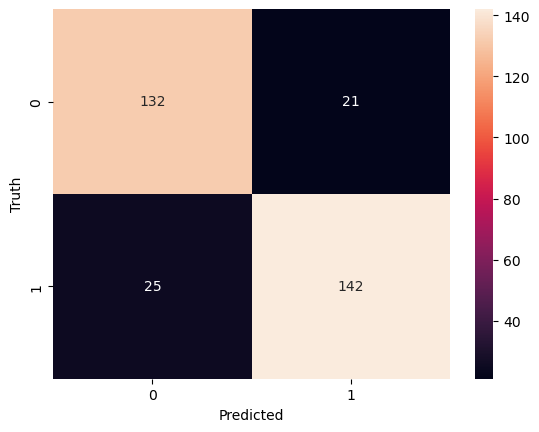

In [38]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

cm = confusion_matrix(y_test, y_predicted)
cm 

from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

print(classification_report(y_test, y_predicted))

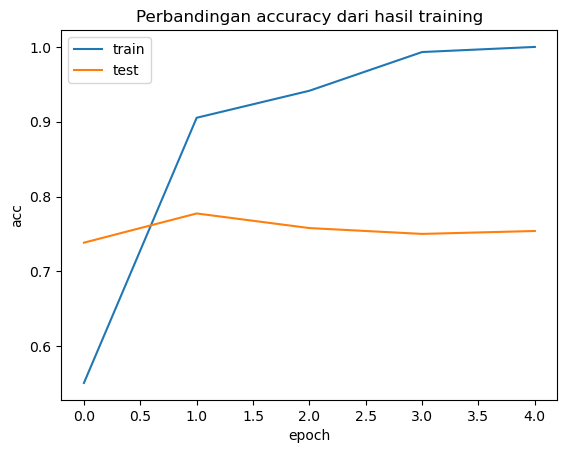

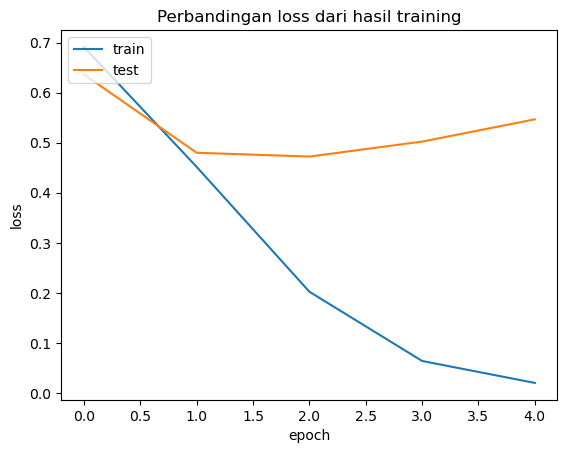

In [39]:
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']

plt.plot(train_acc)
plt.plot(val_acc)
plt.title('Perbandingan accuracy dari hasil training')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(train_loss)
plt.plot(val_loss)
plt.title('Perbandingan loss dari hasil training')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()